<a href="https://colab.research.google.com/github/sheldor07/understainding-transformers/blob/main/multilayer-perceptron-from-scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

# Loading the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:5000]
x_test = x_test[:5000]

y_test = y_test[:5000]
y_train = y_train[:5000]

print(x_train.shape)
print(x_test.shape)
print('----------------')
print(y_train.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(5000, 28, 28)
(5000, 28, 28)
----------------
(5000,)
(5000,)


In [2]:
# reshaping the data to fit our input layer

x_train = x_train.reshape(x_train.shape[0],-1)/255.0
x_test = x_test.reshape(x_test.shape[0],-1)/255.0


print(x_train.shape)
print(x_test.shape)

(5000, 784)
(5000, 784)


In [3]:
#one hot encoding for labels
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape)
print(y_test.shape)

(5000, 10)
(5000, 10)


In [4]:
class NN:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate, epochs):

        # initializing the instance variables
        self.input_neurons = input_neurons
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons
        self.epochs = epochs

        # Links of weights from input layer to hidden layer
        self.wih = np.random.normal(0.0, pow(self.input_neurons, -0.5), (self.hidden_neurons, self.input_neurons))
        self.bih = 0

        # Links of weights from hidden layer to output layer
        self.who = np.random.normal(0.0, pow(self.hidden_neurons, -0.5), (self.output_neurons, self.hidden_neurons))
        self.bho = 0

        self.lr = learning_rate # Learning rate

    def activation(self, z):
        """Returns the sigmoid of z"""
        z = np.clip(z, -500, 500) # Avoid overflow error
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        """Returns the derivative of the sigmoid of z"""
        return self.activation(z) * (1 - self.activation(z))

    # Forward propagation
    def forward(self, input_list):
        inputs = np.array(input_list, ndmin=2).T

        # Passing inputs to the hidden layer
        hidden_inputs = np.dot(self.wih, inputs) + self.bih

        # Getting outputs from the hidden layer
        hidden_outputs = self.activation(hidden_inputs)

        # Passing inputs from the hidden layer to the output layer
        final_inputs = np.dot(self.who, hidden_outputs) + self.bho

        # Getting output from the output layer
        yj = self.activation(final_inputs)

        return yj


    # Back propagation
    def backprop(self, inputs_list, targets_list):

        inputs = np.array(inputs_list, ndmin=2).T

        tj = np.array(targets_list, ndmin=2).T # Targets
        # passing inputs to the hidden layer
        hidden_inputs = np.dot(self.wih, inputs) + self.bih

        # Getting outputs from the hidden layer
        hidden_outputs = self.activation(hidden_inputs)

        # Passing inputs from the hidden layer to the output layer
        final_inputs = np.dot(self.who, hidden_outputs) + self.bho

        # Getting output from the output layer
        yj = self.activation(final_inputs)

        # Finding the errors from the output layer
        output_errors = -(tj - yj)

        # Finding the error in the hidden layer
        hidden_errors = np.dot(self.who.T, output_errors)

        # Updating the weights using Update Rule
        self.who -= self.lr * np.dot((output_errors * self.sigmoid_derivative(yj)), np.transpose(hidden_outputs))
        self.wih -= self.lr * np.dot((hidden_errors * self.sigmoid_derivative(hidden_outputs)), np.transpose(inputs))


        #updating bias
        self.bho -= self.lr * (output_errors * self.sigmoid_derivative(yj))
        self.bih -= self.lr * (hidden_errors * self.sigmoid_derivative(hidden_outputs))
        pass

    # Performing Gradient Descent Optimization using Backpropagation
    def fit(self, inputs_list, targets_list):
        for epoch in range(self.epochs):
            self.backprop(inputs_list, targets_list)
            print(f"Epoch {epoch}/{self.epochs} completed.")

    def predict(self, X):
        outputs = self.forward(X).T
        return outputs

In [11]:
nn = NN(input_neurons=784, hidden_neurons=128, output_neurons=10, learning_rate=0.01, epochs=250)
nn.fit(x_train, y_train)

Epoch 0/250 completed.
Epoch 1/250 completed.
Epoch 2/250 completed.
Epoch 3/250 completed.
Epoch 4/250 completed.
Epoch 5/250 completed.
Epoch 6/250 completed.
Epoch 7/250 completed.
Epoch 8/250 completed.
Epoch 9/250 completed.
Epoch 10/250 completed.
Epoch 11/250 completed.
Epoch 12/250 completed.
Epoch 13/250 completed.
Epoch 14/250 completed.
Epoch 15/250 completed.
Epoch 16/250 completed.
Epoch 17/250 completed.
Epoch 18/250 completed.
Epoch 19/250 completed.
Epoch 20/250 completed.
Epoch 21/250 completed.
Epoch 22/250 completed.
Epoch 23/250 completed.
Epoch 24/250 completed.
Epoch 25/250 completed.
Epoch 26/250 completed.
Epoch 27/250 completed.
Epoch 28/250 completed.
Epoch 29/250 completed.
Epoch 30/250 completed.
Epoch 31/250 completed.
Epoch 32/250 completed.
Epoch 33/250 completed.
Epoch 34/250 completed.
Epoch 35/250 completed.
Epoch 36/250 completed.
Epoch 37/250 completed.
Epoch 38/250 completed.
Epoch 39/250 completed.
Epoch 40/250 completed.
Epoch 41/250 completed.
Ep

In [12]:
# Predicting probabiliies
probs = nn.predict(x_test)


# Converting probabilities to one-hot vector format
predictions = []

for prob in probs:
    max_idx = np.argmax(prob)
    prediction = np.zeros_like(prob)
    prediction[max_idx] = 1
    predictions.append(prediction)


In [13]:
from sklearn.metrics import accuracy_score, classification_report

# Converting probabilities to predicted labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Calculating accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

# Generating classification report
report = classification_report(true_labels, predicted_labels)
print("Classification Report:\n", report)



Accuracy: 0.7286
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.86      0.75       507
           1       0.89      0.95      0.92       481
           2       0.76      0.32      0.45       521
           3       0.84      0.78      0.81       500
           4       0.44      0.88      0.59       521
           5       0.82      0.77      0.79       485
           6       0.75      0.01      0.02       482
           7       0.84      0.85      0.84       500
           8       0.82      0.94      0.87       526
           9       0.82      0.91      0.86       477

    accuracy                           0.73      5000
   macro avg       0.76      0.73      0.69      5000
weighted avg       0.76      0.73      0.69      5000



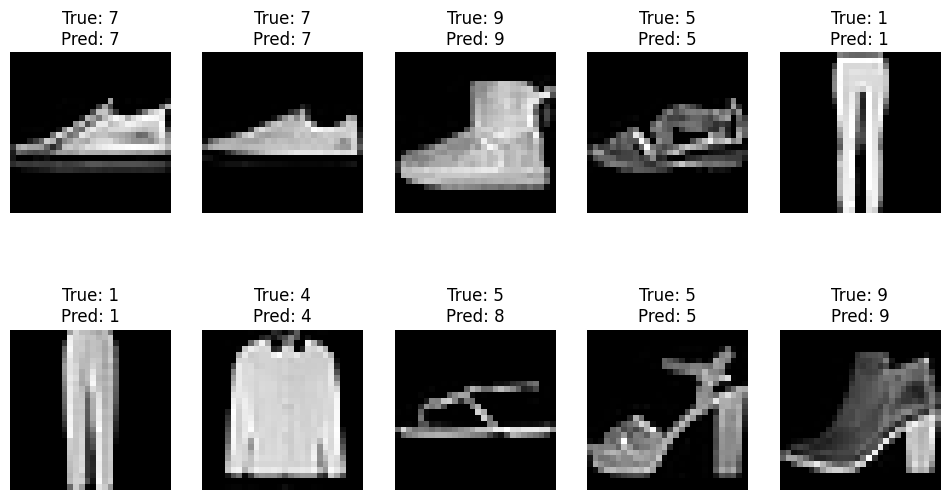

In [14]:
import matplotlib.pyplot as plt
import random

# Select 10 random samples
random_indices = random.sample(range(len(x_test)), 10)
random_samples = x_test[random_indices]
random_labels = true_labels[random_indices]
random_predictions = predicted_labels[random_indices]

# Create a figure with 2 rows and 5 columns
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
fig.subplots_adjust(hspace=0.5)

# Plot the images and their predicted labels
for i, ax in enumerate(axs.flatten()):
    ax.imshow(random_samples[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {random_labels[i]}\nPred: {random_predictions[i]}")
    ax.axis('off')

plt.show()
